In [23]:
import pandas as pd
cycle_original=pd.read_json(r"https://raw.githubusercontent.com/theand9/data-viz-challenge/master/data.json")
cycle_original.head()

,data
0,"{'category': 'Sports', 'event_name': 'View Pro..."
1,"{'category': 'Technology', 'event_name': 'View..."
2,"{'category': 'Environment', 'event_name': 'Vie..."
3,"{'category': 'Technology', 'event_name': 'View..."
4,"{'category': 'Sports', 'event_name': 'View Pro..."


In [24]:
cycle_original.shape

(50000, 1)

In [25]:
df=[]
df.clear()
   
for column in cycle_original['data']: 
    df.append(column)
    
cycle=pd.DataFrame(df)
cycle.tail()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount
49995,Sports,Fund Project,F,18-24,married,412b973788704c36a008a506cdbba033,iOS,1396309720,"{'latitude': 45.343615, 'city': 'West Linn', '...",35.0
49996,Technology,View Project,F,45-54,single,4addd36a6f4347c59865fe04a92e8d57,android,1396309769,"{'latitude': 41.079983, 'city': 'Greenwich', '...",NaN
49997,Fashion,View Project,F,25-34,single,3181a138a0b94d1da9a3d29f7816fcc7,iOS,1396309893,"{'latitude': 40.36502, 'city': 'Irwin', 'state...",NaN
49998,Sports,Fund Project,F,35-44,married,2df6b9a0c66b48a389330327517b9276,iOS,1396309968,"{'latitude': 39.477625, 'city': 'Martinsville'...",37.0
49999,Fashion,View Project,M,18-24,single,fc24339bfda84ff29102981cbee78023,iOS,1396310325,"{'latitude': 45.408374, 'city': 'Lake Oswego',...",NaN


In [26]:
cycle.shape

(50000, 10)

In [27]:
cycle.drop(['location','client_time','session_id'],axis=1,inplace=True)
cycle.head()

,category,event_name,gender,age,marital_status,device,amount
0,Sports,View Project,M,18-24,married,android,NaN
1,Technology,View Project,M,18-24,single,iOS,NaN
2,Environment,View Project,M,55+,single,iOS,NaN
3,Technology,View Project,M,18-24,single,android,NaN
4,Sports,View Project,F,25-34,married,iOS,NaN


In [28]:
cycle.category.unique()

array(['Sports', 'Technology', 'Environment', 'Fashion', 'Games'],
      dtype=object)

In [29]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

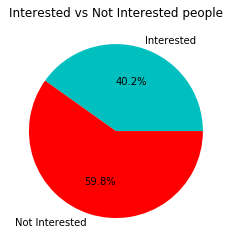

In [30]:
a=cycle.category[cycle.category=='Sports'].count()+cycle.category[cycle.category=='Environment'].count()
b=cycle.category[cycle.category=='Technology'].count()+cycle.category[cycle.category=='Fashion'].count()+cycle.category[cycle.category=='Games'].count()
partitions=[a,b]
desc=['Interested','Not Interested']
col=['c','r']
plt.pie(partitions,labels=desc,colors=col,startangle=0,autopct='%1.1f%%')
plt.title('Interested vs Not Interested people')
plt.show()

* It can be seen that only about 40% of the total people might be interested in the bicycle project.


In [31]:
cycle=cycle[(cycle.category=='Sports')| (cycle.category=='Environment')]
cycle

,category,event_name,gender,age,marital_status,device,amount
0,Sports,View Project,M,18-24,married,android,NaN
2,Environment,View Project,M,55+,single,iOS,NaN
4,Sports,View Project,F,25-34,married,iOS,NaN
12,Sports,View Project,F,18-24,married,iOS,NaN
16,Sports,Fund Project,M,18-24,married,android,31.0
...,...,...,...,...,...,...,...
49984,Environment,Fund Project,M,18-24,married,android,23.0
49989,Sports,Fund Project,M,18-24,single,iOS,37.0
49994,Environment,Fund Project,F,35-44,single,android,35.0
49995,Sports,Fund Project,F,18-24,married,iOS,35.0


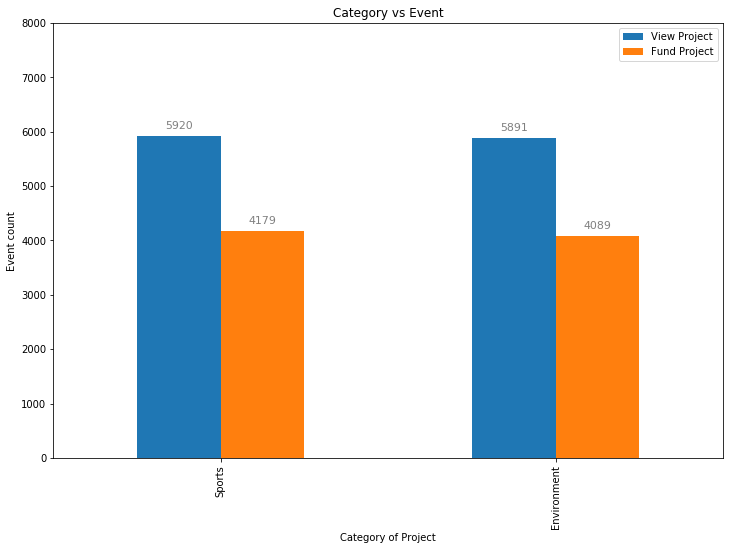

In [32]:
y1=[((cycle.category=='Sports')&(cycle.event_name=='View Project')).sum(),((cycle.category=='Environment')&(cycle.event_name=='View Project')).sum()]
y2=[((cycle.category=='Sports')&(cycle.event_name=='Fund Project')).sum(),((cycle.category=='Environment')&(cycle.event_name=='Fund Project')).sum()]
df1=pd.DataFrame({'View Project':y1,'Fund Project':y2},index=['Sports','Environment'])
p1=df1.plot(kind='bar',figsize=(12,8))
p1.set_title('Category vs Event')
p1.set(xlabel='Category of Project',ylabel='Event count',ylim=(0,8000))
plt.legend()
for p in p1.patches:
    p1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
    textcoords='offset points')
plt.show()

* It can be observed that less than half of the people from both **Sports** as well as **Environment** section fund the project.
* The ratio of Funding to Viewing project is almost equal for both the categories.

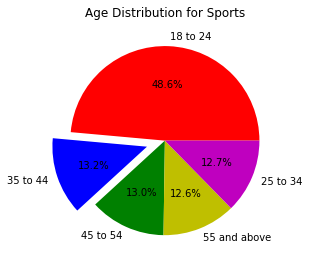

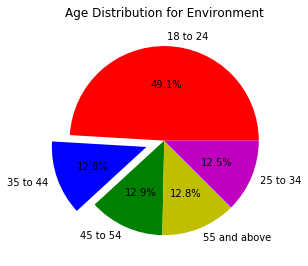

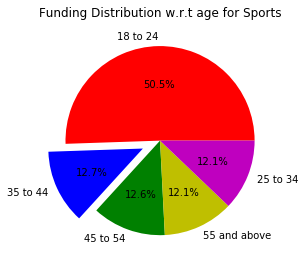

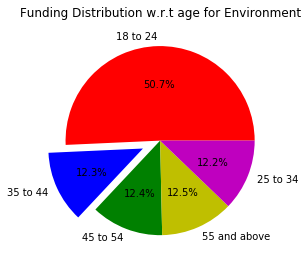

In [33]:
fig=plt.figure(figsize=(20,20))
ax1=plt.subplot2grid((4,1),(0,0))
as1=((cycle.age=='18-24')&(cycle.category=='Sports'))
as2=((cycle.age=='35-44')&(cycle.category=='Sports'))
as3=((cycle.age=='45-54')&(cycle.category=='Sports'))
as4=((cycle.age=='55+')&(cycle.category=='Sports'))
as5=((cycle.age=='25-34')&(cycle.category=='Sports'))
Age=[as1.sum(),as2.sum(),as3.sum(),as4.sum(),as5.sum()]
name_age=['18 to 24','35 to 44','45 to 54','55 and above','25 to 34']
colour=['r','b','g','y','m']
plt.pie(Age,labels=name_age,colors=colour,startangle=0,explode=(0,0.2,0,0,0),autopct='%1.1f%%')
plt.title('Age Distribution for Sports')
plt.show()

af1=((cycle.age=='18-24')&(cycle.category=='Environment'))
af2=((cycle.age=='35-44')&(cycle.category=='Environment'))
af3=((cycle.age=='45-54')&(cycle.category=='Environment'))
af4=((cycle.age=='55+')&(cycle.category=='Environment'))
af5=((cycle.age=='25-34')&(cycle.category=='Environment'))
fig=plt.figure(figsize=(20,20))
ax1=plt.subplot2grid((4,1),(1,0))
Age=[af1.sum(),af2.sum(),af3.sum(),af4.sum(),af5.sum()]
name_age=['18 to 24','35 to 44','45 to 54','55 and above','25 to 34']
colour=['r','b','g','y','m']
plt.pie(Age,labels=name_age,colors=colour,startangle=0,explode=(0,0.2,0,0,0),autopct='%1.1f%%')
plt.title('Age Distribution for Environment')
plt.show()

F=(cycle.event_name=='Fund Project')
fig=plt.figure(figsize=(20,20))
ax1=plt.subplot2grid((4,1),(2,0))
Age=[((as1)&(F)).sum(),((as2)&(F)).sum(),((as3)&(F)).sum(),((as4)&(F)).sum(),((as5)&(F)).sum()]
name_age=['18 to 24','35 to 44','45 to 54','55 and above','25 to 34']
colour=['r','b','g','y','m']
plt.pie(Age,labels=name_age,colors=colour,startangle=0,explode=(0,0.2,0,0,0),autopct='%1.1f%%')
plt.title('Funding Distribution w.r.t age for Sports')
plt.show()

fig=plt.figure(figsize=(20,20))
ax1=plt.subplot2grid((4,1),(3,0))
Age=[((af1)&(F)).sum(),((af2)&(F)).sum(),((af3)&(F)).sum(),((af4)&(F)).sum(),((af5)&(F)).sum()]
name_age=['18 to 24','35 to 44','45 to 54','55 and above','25 to 34']
colour=['r','b','g','y','m']
plt.pie(Age,labels=name_age,colors=colour,startangle=0,explode=(0,0.2,0,0,0),autopct='%1.1f%%')
plt.title('Funding Distribution w.r.t age for Environment')
plt.show()


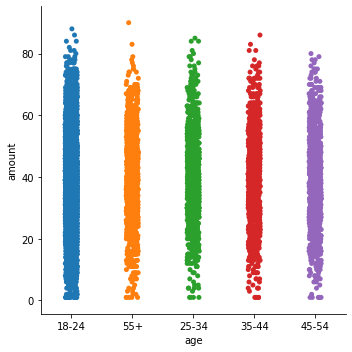

In [34]:
figsize=(15,10)
p=sns.catplot(x='age',y='amount',data=cycle)

* From the first 2 plots it can be seen that in both the categories,i.e. **Sports** and **Environment**, majority of the crowd belongs to the age group 18-24.
* It shows more younger people might be interested in the project.
* From plots 3 & 4 ,it is evident that the younger people have not only viewed the project but also have been the most active group to fund the project.
* The funds donated by people of every age group has a similar range,i.e. between 0 to about 100.

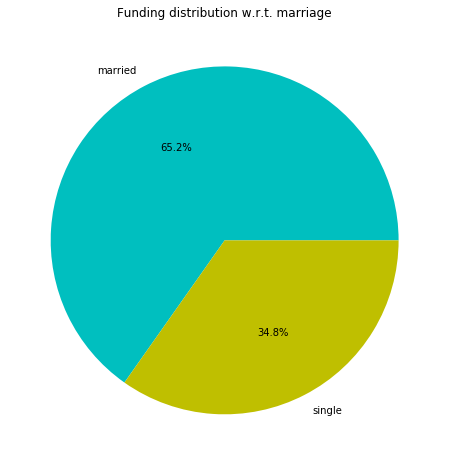

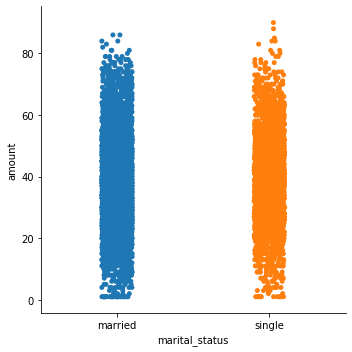

In [35]:
fig=plt.figure(figsize=(8,8))
marriage=[((cycle.marital_status=='married')&(cycle.event_name=='Fund Project')).sum(),((cycle.marital_status=='single')&(cycle.event_name=='Fund Project')).sum()]
name_marital=['married','single']
col=['c','y']
plt.pie(marriage,labels=name_marital,colors=col,startangle=0,autopct='%1.1f%%')
plt.title('Funding distribution w.r.t. marriage')
plt.show()

figsize=(10,10)
p=sns.catplot(x='marital_status',y='amount',data=cycle)

* Out of all people who have shown interest in Funding the project,about 2/3rd of them are married.
* Also,Funding amount for each category of people ranges from 0 to about 100

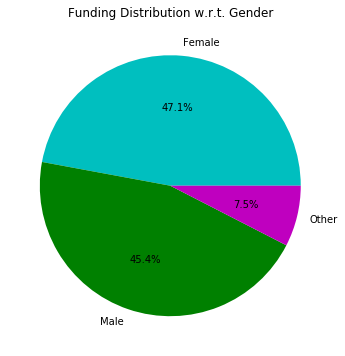

In [36]:
fig=plt.figure(figsize=(8,6))
Gender=[((cycle.gender=='F')&(cycle.event_name=='Fund Project')).sum(),((cycle.gender=='M')&(cycle.event_name=='Fund Project')).sum(),((cycle.gender=='U')&(cycle.event_name=='Fund Project')).sum()]
gen_type=['Female','Male','Other']
col=['c','g','m']
plt.pie(Gender,labels=gen_type,colors=col,startangle=0,autopct='%1.1f%%')
plt.title('Funding Distribution w.r.t. Gender')
plt.show()

* Almost equal **Men** and **Women** have been funding the project. 

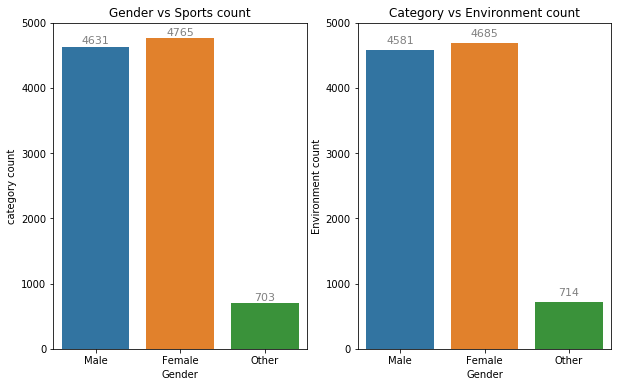

In [37]:
ms=((cycle.category=='Sports')&(cycle.gender=='M')).sum()
fs=((cycle.category=='Sports')&(cycle.gender=='F')).sum()
us=((cycle.category=='Sports')&(cycle.gender=='U')).sum()
me=((cycle.category=='Environment')&(cycle.gender=='M')).sum()
fe=((cycle.category=='Environment')&(cycle.gender=='F')).sum()
ue=((cycle.category=='Environment')&(cycle.gender=='U')).sum()
S=[ms,fs,us]
E=[me,fe,ue]
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
p1=sns.barplot(x=['Male','Female','Other'],y=S,ax=ax1)
p2=sns.barplot(x=['Male','Female','Other'],y=E,ax=ax2)
p1.set_title('Gender vs Sports count')
p1.set(xlabel='Gender',ylabel='category count',ylim=(0,5000))
p2.set_title('Category vs Environment count')
p2.set(xlabel='Gender',ylabel='Environment count',ylim=(0,5000))
for p in p1.patches:
             p1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 6),
                 textcoords='offset points')
for p in p2.patches:
             p2.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')

* There has been quite a balance between the categories from which people of various **Genders** come from.

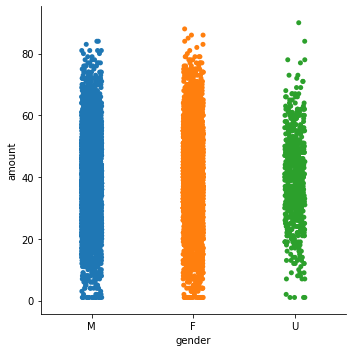

In [38]:
figsize=(15,10)
p=sns.catplot(x='gender',y='amount',data=cycle)

* The funding range of people of each gender is similar and ranges from **0** to around **100**